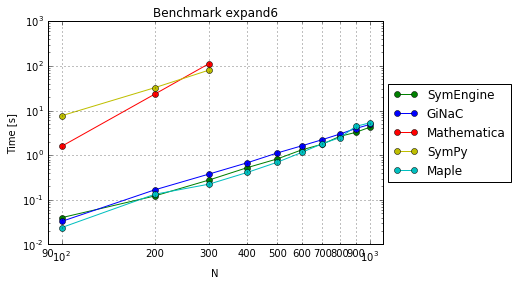

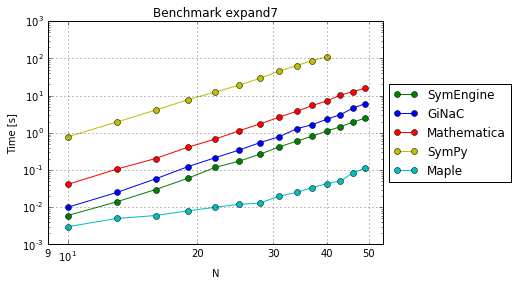

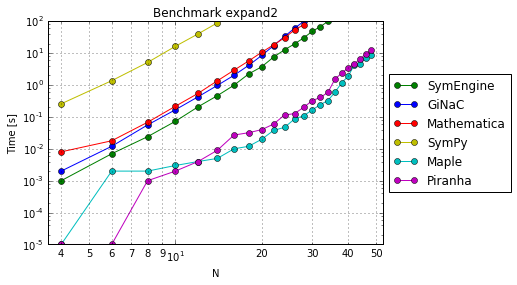

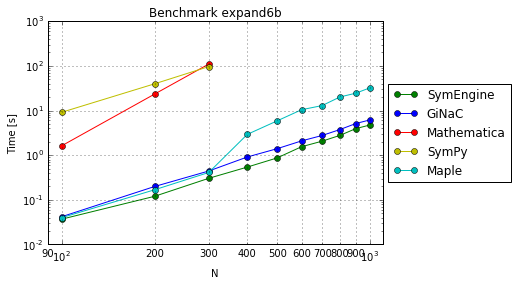

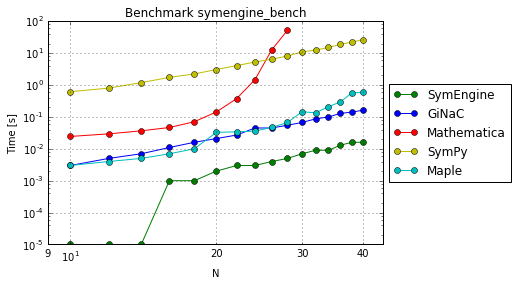

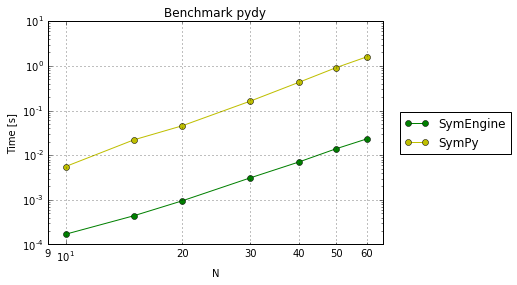

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np
from matplotlib.ticker import FormatStrFormatter
with open('data.json', 'r') as f:
    tests = json.loads(f.read())
for test in tests:
    name = test[0]
    param = test[1][:]
    for i in range(2, len(test)):
        test[i] = np.array(test[i])/1000 # convert from ms to s
    if (len(test) > 4):
        plt.loglog(param, test[2], 'go-', label="SymEngine")
        plt.loglog(param, test[3], 'bo-', label="GiNaC")
        plt.loglog(param, test[4], 'ro-', label="Mathematica")
        plt.loglog(param, test[5], 'yo-', label="SymPy")
        plt.loglog(param, test[6], 'co-', label="Maple")
    else:
        plt.loglog(param, test[2], 'go-', label="SymEngine")
        plt.loglog(param, test[3], 'yo-', label="SymPy")
        
    if (len(test) > 7):
        plt.loglog(param, test[-1], 'mo-', label="Piranha")
    
    plt.xlim([0.9*param[0], 1.1*param[-1]])
    plt.xlabel('N')
    plt.ylabel('Time [s]')
    plt.title("Benchmark "+name)
    lgd = plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5))
    plt.gca().xaxis.grid(which="both")
    plt.gca().yaxis.grid()
    plt.tick_params(axis='x', which='minor')
    plt.gca().xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
    plt.savefig('../images/%s.pdf' % name, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()